In [1]:
!pip install xgboost

In [7]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
y = [0,0,1,1,1,0,1,0,1,1,1,1,1,0]
X = pd.DataFrame({
    'dia': [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'aspecto': [1,1,0,-1,-1,-1,0,1,1,-1,0,0,0,-1],
    'temperatura': [1,1,1,0,-1,-1,-1,0,-1,0,0,0,1,0],
    'umidade': [1,1,1,1,0,0,0,1,0,0,0,1,0,1],
    'vento': [0,1,0,0,0,1,1,0,0,0,1,1,0,1]
})


# Dividir o conjunto de dados em treino e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converter os dados para o formato DMatrix do XGBoost
#dtrain = xgb.DMatrix(X_train, label=y_train)
#dtest = xgb.DMatrix(X_test, label=y_test)
dtrain = xgb.DMatrix(X, label=y)

# Definir parâmetros
param = {
    'max_depth': 10,  # profundidade máxima de cada árvore
    'eta': 0.3,      # taxa de aprendizagem
    'objective': 'multi:softmax',  # objetivo da aprendizagem
    'num_class': 2}  # número de classes

In [13]:
# Treinar o modelo
num_round = 20  # número de iterações de treinamento
bst = xgb.train(param, dtrain, num_round)

# Fazer previsões
preds = bst.predict(dtrain)

# Avaliar a acurácia
accuracy = accuracy_score(y, preds)
print(f"Acurácia: {accuracy}")


Acurácia: 1.0


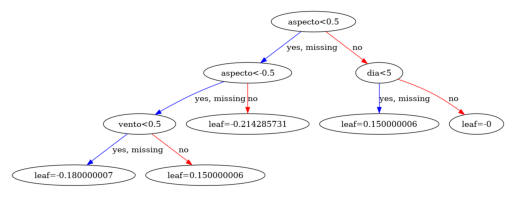

In [14]:
# Visualizar a primeira árvore
xgb.plot_tree(bst, num_trees=0)
plt.show()